## Basic Statistics

In [1]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
ai_assistant = pd.read_csv(r"ai_assistant_usage_student_life.csv")
ai_assistant.head(5)

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [3]:
# Check the data shape
ai_assistant.shape

(10000, 11)

In [4]:
ai_assistant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [5]:
# Check for missing values in the data
ai_assistant.isnull().sum()

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

In [6]:
# Summary statistics for SessionLength and Total Prompts
ai_assistant[['SessionLengthMin', 'TotalPrompts']].describe()

,SessionLengthMin,TotalPrompts
count,10000.000000,10000.000000
mean,19.846467,5.607500
std,13.897302,4.648764
min,0.030000,1.000000
25%,9.630000,2.000000
50%,16.650000,4.000000
75%,26.670000,8.000000
max,110.810000,39.000000


In [7]:
# Find the number of unique values in student level, tasktype and discipline
unique_counts = ai_assistant[['StudentLevel', 'Discipline', 'TaskType']].nunique()
print(unique_counts)

StudentLevel    3
Discipline      7
TaskType        6
dtype: int64


In [8]:
# The most common tasktype
ai_assistant['TaskType'].value_counts()

TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64

In [9]:
# the average SessionLengthMin for each StudentLevel
ai_assistant.groupby('StudentLevel')['SessionLengthMin'].mean()

StudentLevel
Graduate         20.252236
High School      20.023740
Undergraduate    19.650943
Name: SessionLengthMin, dtype: float64

## Visualization

C:\Users\USER\AppData\Local\Temp\ipykernel_5888\3441030451.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


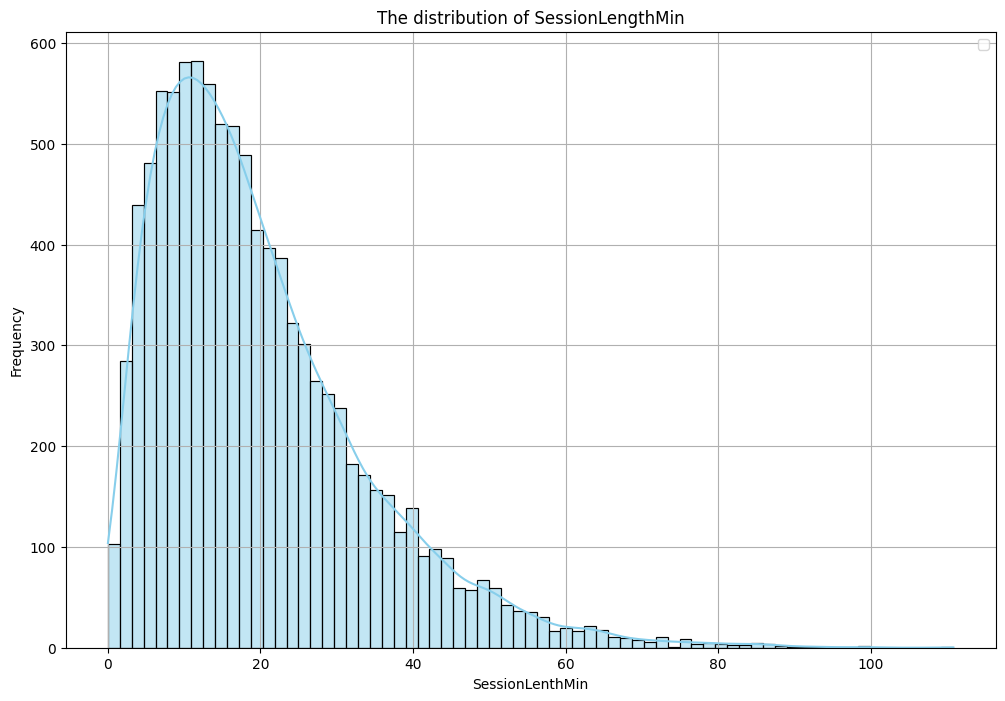

In [10]:
# Histogram of SessionLengthMin
plt.figure(figsize=(12,8))
sns.histplot(ai_assistant, x= ai_assistant['SessionLengthMin'], kde=True, color='skyblue')
plt.title("The distribution of SessionLengthMin")
plt.xlabel("SessionLenthMin")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

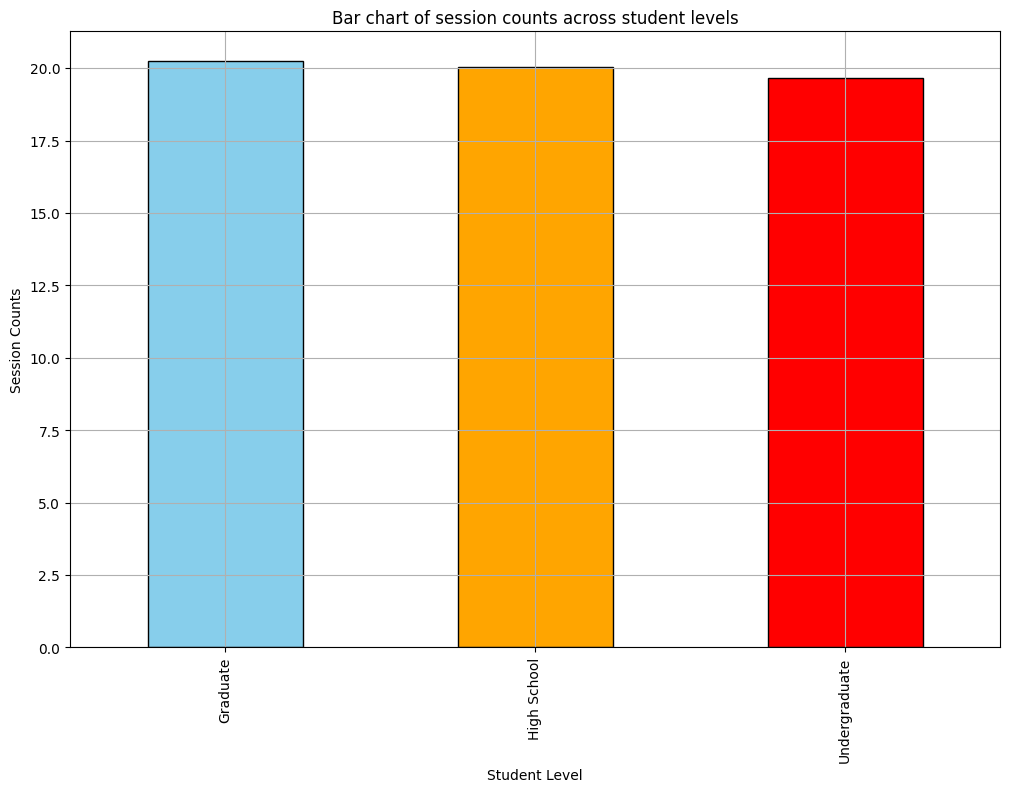

In [11]:
# Bar chart of session counts by student level
session_counts = ai_assistant.groupby('StudentLevel')['SessionLengthMin'].mean()
plt.figure(figsize=(12,8))
session_counts.plot(kind='bar', color = ['skyblue', 'orange', 'red'], edgecolor = 'black')
plt.title('Bar chart of session counts across student levels')
plt.xlabel('Student Level')
plt.ylabel('Session Counts')
plt.grid(True)
plt.show()

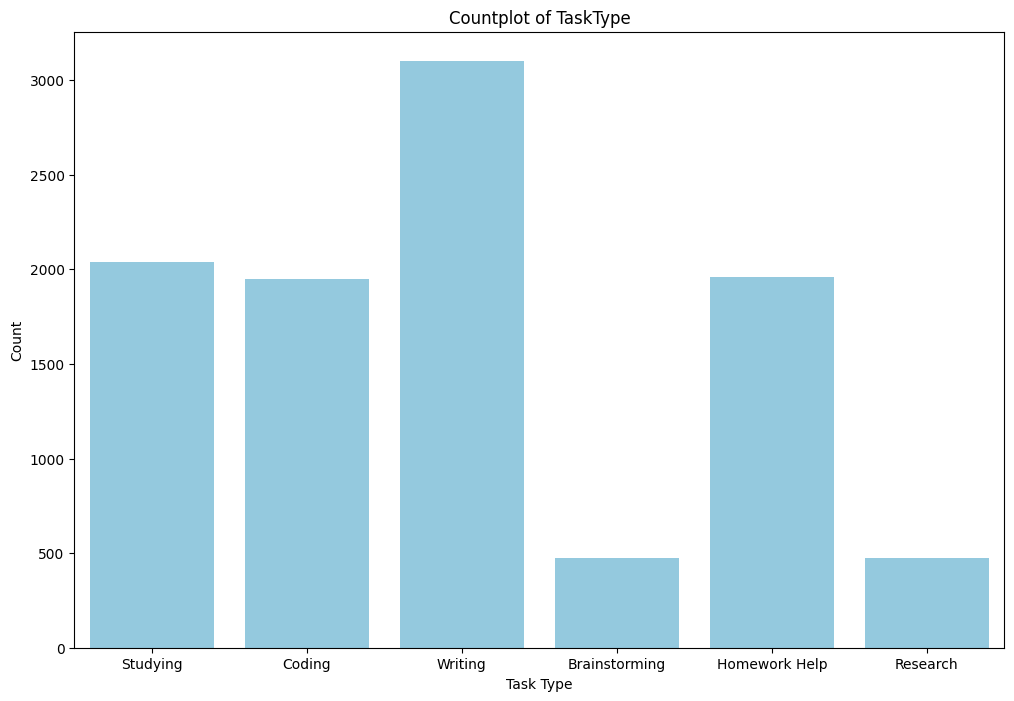

In [12]:
# Countplot of Tasktype
plt.figure(figsize=(12,8))
sns.countplot(x=ai_assistant['TaskType'], color='skyblue')
plt.title("Countplot of TaskType")
plt.xlabel("Task Type")
plt.ylabel("Count")
plt.show()

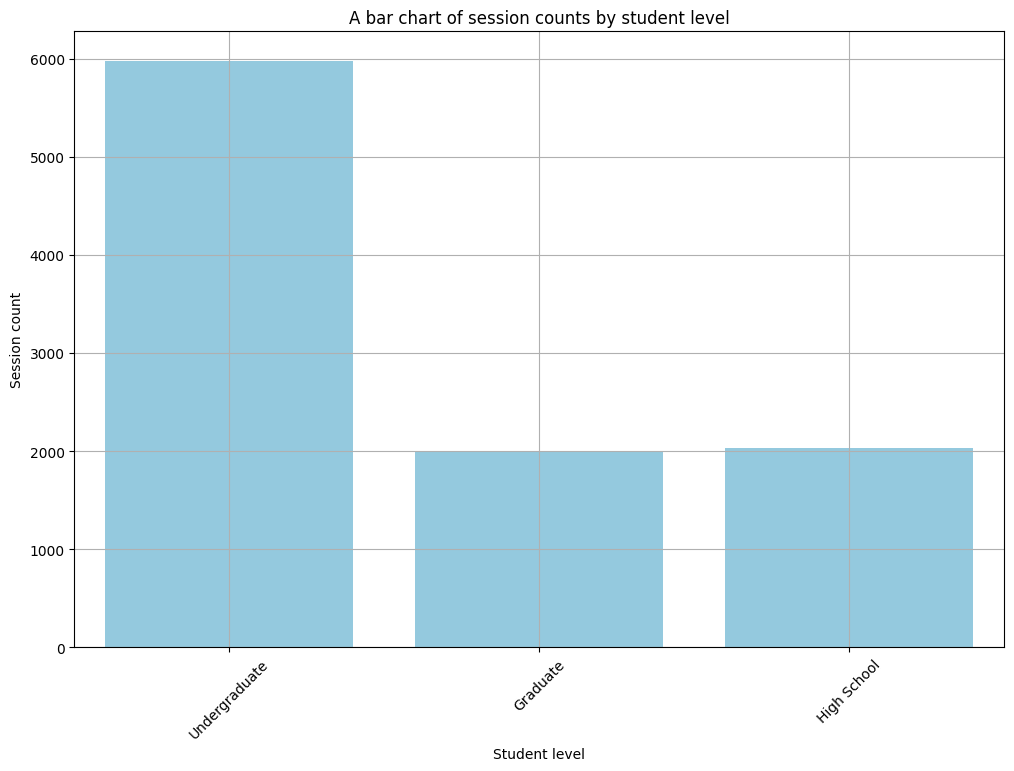

In [13]:
# Bar chart of session counts by student level
plt.figure(figsize=(12,8))
sns.countplot(x=ai_assistant['StudentLevel'], color='skyblue')
plt.title('A bar chart of session counts by student level')
plt.xlabel('Student level')
plt.ylabel('Session count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_5888\3480872627.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=ai_assistant['StudentLevel'], y=ai_assistant['SessionLengthMin'], palette='Set2')


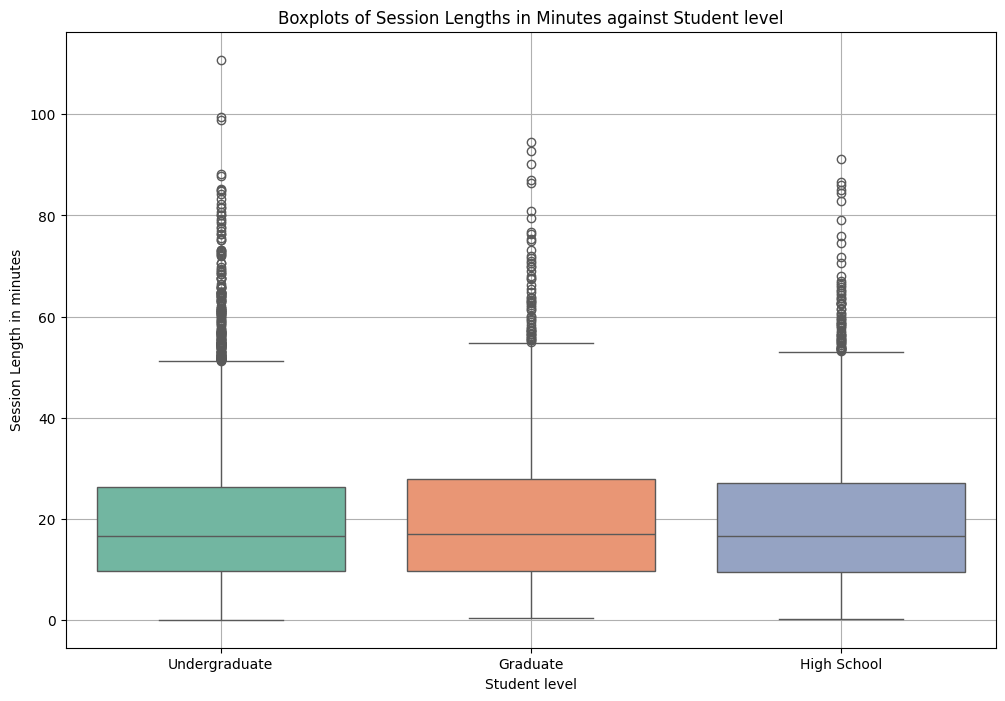

In [14]:
# boxplot of SessionLengthMin grouped by StudentLevel
plt.figure(figsize=(12,8))
sns.boxplot(x=ai_assistant['StudentLevel'], y=ai_assistant['SessionLengthMin'], palette='Set2')
plt.title('Boxplots of Session Lengths in Minutes against Student level')
plt.xlabel('Student level')
plt.ylabel('Session Length in minutes')
plt.grid(True)
plt.show()

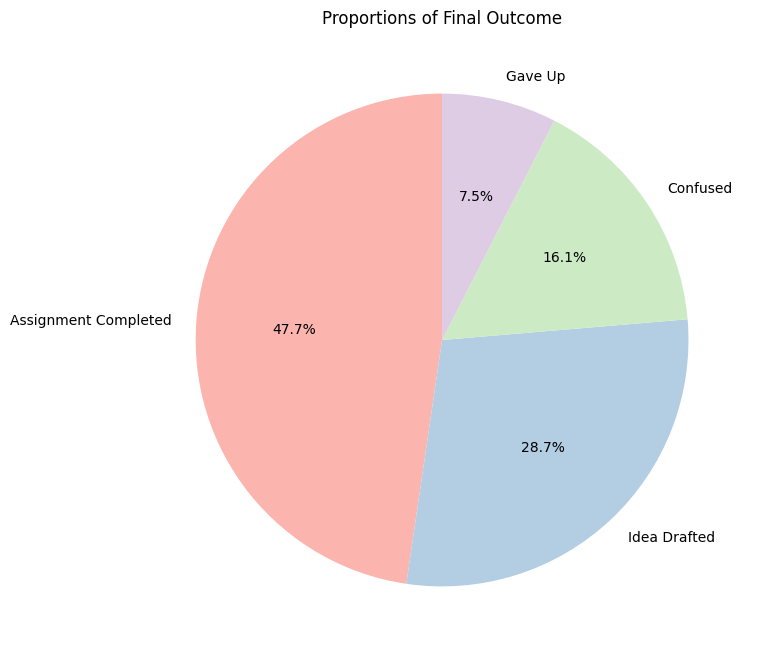

In [15]:
# Create a pie chart showing the proportions of final outcome
# Count occurrence of each final outcome
outcome_counts = ai_assistant['FinalOutcome'].value_counts()

plt.figure(figsize=(12,8))
plt.pie(outcome_counts, labels=outcome_counts.index, 
        startangle=90, autopct='%1.1f%%',
        colors=plt.cm.Pastel1.colors)
plt.title('Proportions of Final Outcome')
plt.show()

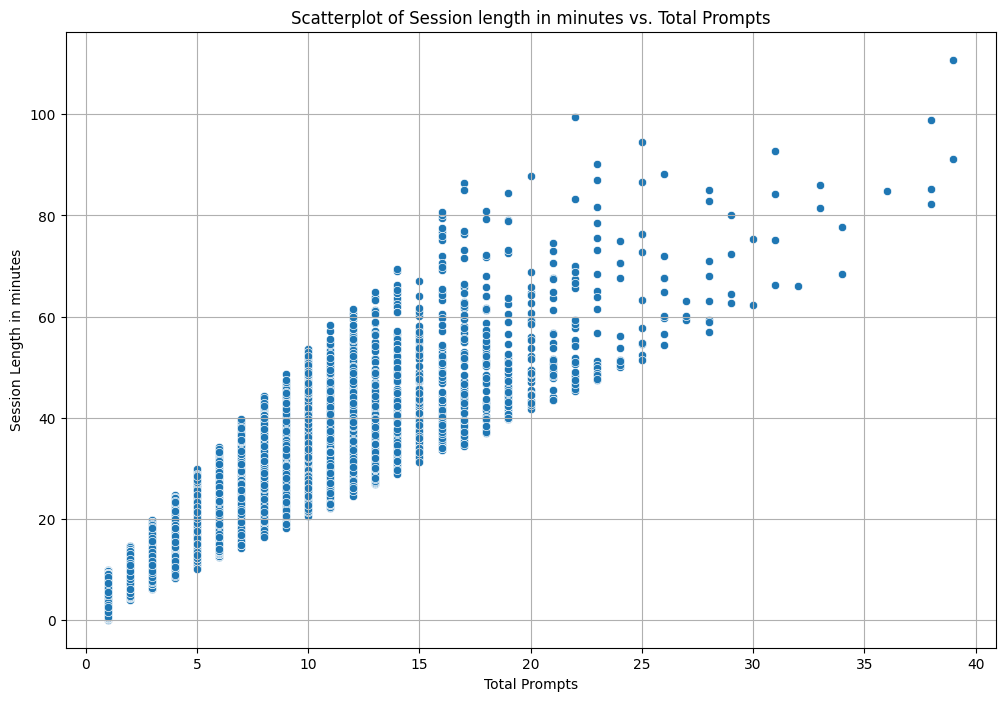

In [16]:
# scatterplot of SessionLengthMin vs. TotalPrompts.
plt.figure(figsize=(12,8))
sns.scatterplot(x=ai_assistant['TotalPrompts'], y=ai_assistant['SessionLengthMin'])
plt.title('Scatterplot of Session length in minutes vs. Total Prompts')
plt.xlabel('Total Prompts')
plt.ylabel('Session Length in minutes')
plt.grid(True)
plt.show()


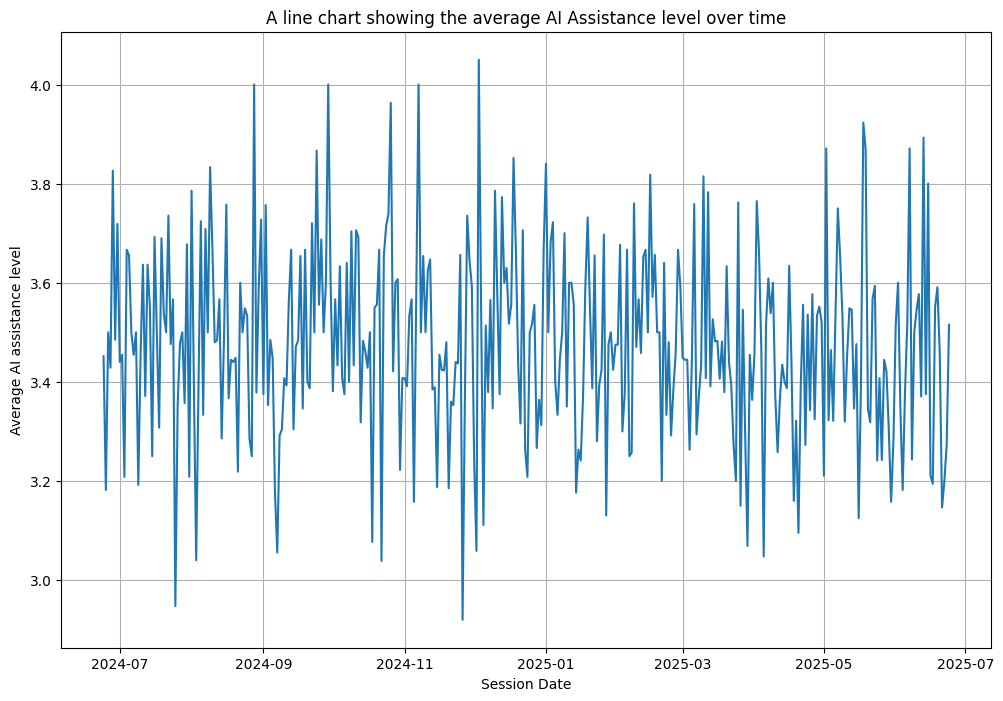

In [17]:
# line chart of average AI_AssistanceLevel over time (SessionDate).
# convert the session date column to datetime
from datetime import datetime
ai_assistant['SessionDate'] = pd.to_datetime(ai_assistant['SessionDate'])
# Get the everage AI assistant level per date (Group by Time)
avg_assistance = ai_assistant.groupby('SessionDate')['AI_AssistanceLevel'].mean().reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(x='SessionDate', y='AI_AssistanceLevel', data=avg_assistance)
plt.title('A line chart showing the average AI Assistance level over time')
plt.xlabel('Session Date')
plt.ylabel('Average AI assistance level')
plt.grid(True)
plt.show()

In [18]:
# Create a  correlation heatmap
df = ai_assistant.select_dtypes(include=('int64', 'float64'))
correlation_matrix = df.corr()


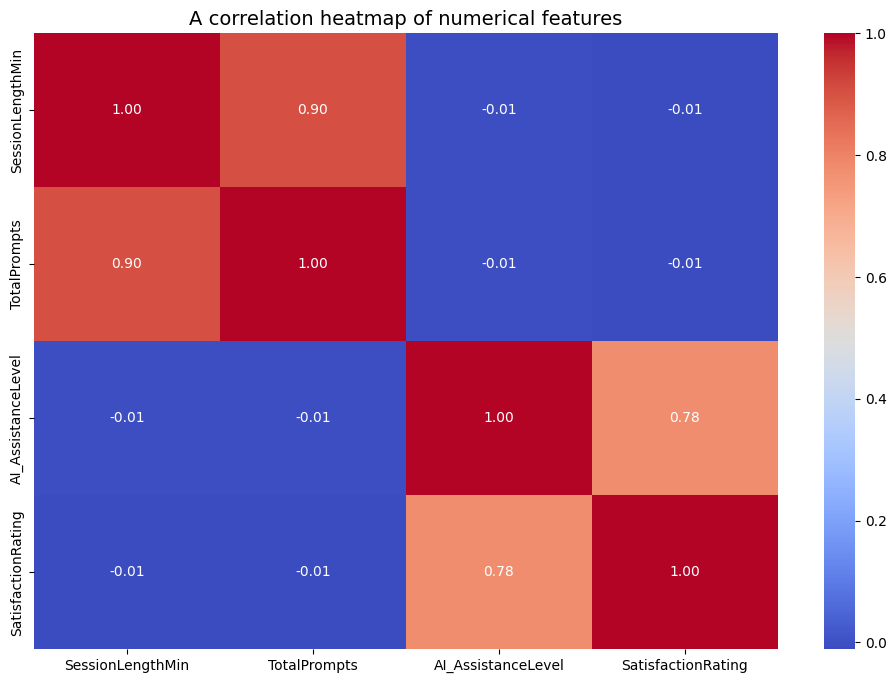

In [19]:
# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('A correlation heatmap of numerical features', fontsize=14)
plt.show()

## GroupBy & Aggregations

In [20]:
# Average SessionLengthMin for each TaskType.
Avg_session_tasktype = ai_assistant.groupby('TaskType')['SessionLengthMin'].mean()
print(Avg_session_tasktype)

TaskType
Brainstorming    21.964223
Coding           19.467659
Homework Help    19.940536
Research         20.410000
Studying         19.705917
Writing          19.705888
Name: SessionLengthMin, dtype: float64


In [21]:
# Discipline that had the most sessions
discipline_counts = ai_assistant['Discipline'].value_counts()
print(discipline_counts)

Discipline
Biology             1458
Computer Science    1445
Engineering         1430
Math                1422
Psychology          1418
History             1417
Business            1410
Name: count, dtype: int64


In [22]:
# Compare average AI_AssistanceLevel across StudentLevel
Avg_assist_Student_level = ai_assistant.groupby('StudentLevel')['AI_AssistanceLevel'].mean()
print(Avg_assist_Student_level)

StudentLevel
Graduate         3.469674
High School      3.477060
Undergraduate    3.483607
Name: AI_AssistanceLevel, dtype: float64


In [23]:
# the most common FinalOutcome for Graduate students.
graduate_outcomes = ai_assistant[ai_assistant['StudentLevel'] == 'Graduate']['FinalOutcome']
most_common_outcome = graduate_outcomes.value_counts()
print(most_common_outcome)

FinalOutcome
Assignment Completed    936
Idea Drafted            567
Confused                331
Gave Up                 161
Name: count, dtype: int64


In [24]:
# the median SessionLengthMin for each FinalOutcome
median_session_outcome = ai_assistant.groupby('FinalOutcome')['SessionLengthMin'].median()
print(median_session_outcome)

FinalOutcome
Assignment Completed    16.570
Confused                16.040
Gave Up                 17.290
Idea Drafted            17.085
Name: SessionLengthMin, dtype: float64


## Feature Engineering & Encoding

In [25]:
# Convert the session date column into date format
from datetime import datetime
ai_assistant['SessionDate'] = pd.to_datetime(ai_assistant['SessionDate'])

In [26]:
# Encode StudentLevel using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ai_assistant['StudentLevel'] = le.fit_transform(ai_assistant['StudentLevel'])

In [27]:
ai_assistant_encoded = pd.get_dummies(ai_assistant, columns=['TaskType'], prefix='Task')
print(ai_assistant_encoded.head())

      SessionID  StudentLevel        Discipline SessionDate  SessionLengthMin  \
0  SESSION00001             2  Computer Science  2024-11-03             31.20   
1  SESSION00002             2        Psychology  2024-08-25             13.09   
2  SESSION00003             2          Business  2025-01-12             19.22   
3  SESSION00004             2  Computer Science  2025-05-06              3.70   
4  SESSION00005             2        Psychology  2025-03-18             28.12   

   TotalPrompts  AI_AssistanceLevel          FinalOutcome  UsedAgain  \
0            11                   2  Assignment Completed       True   
1             6                   3  Assignment Completed       True   
2             5                   3  Assignment Completed       True   
3             1                   3  Assignment Completed       True   
4             9                   3  Assignment Completed       True   

   SatisfactionRating  Task_Brainstorming  Task_Coding  Task_Homework Help  \
0 

In [28]:
# Create a new feature
ai_assistant['PromptsPerMinute'] = ai_assistant['TotalPrompts']/ai_assistant['SessionLengthMin']
ai_assistant.head(5)

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,PromptsPerMinute
0,SESSION00001,2,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,0.352564
1,SESSION00002,2,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,0.458365
2,SESSION00003,2,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,0.260146
3,SESSION00004,2,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,0.270270
4,SESSION00005,2,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,0.320057


In [29]:
# Define bins and labels
bins = [0, 30, 60, float('inf')]
labels = ['short', 'medium', 'long']
# Create new categorical column
ai_assistant['SessionLengthCategory'] = pd.cut(ai_assistant['SessionLengthMin'], bins=bins, labels=labels, right=False)

print(ai_assistant[['SessionLengthMin', 'SessionLengthCategory']].head())

   SessionLengthMin SessionLengthCategory
0             31.20                medium
1             13.09                 short
2             19.22                 short
3              3.70                 short
4             28.12                 short


## Machine Learning (Classification Models)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Drop columns not to be used
ai_assistant = ai_assistant.drop(columns=['SessionID', 'SessionDate', 'PromptsPerMinute', 'SessionLengthCategory'])

In [32]:
ai_assistant.head()

,StudentLevel,Discipline,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,2,Computer Science,31.20,11,Studying,2,Assignment Completed,True,1.0
1,2,Psychology,13.09,6,Studying,3,Assignment Completed,True,2.0
2,2,Business,19.22,5,Coding,3,Assignment Completed,True,3.3
3,2,Computer Science,3.70,1,Coding,3,Assignment Completed,True,3.5
4,2,Psychology,28.12,9,Writing,3,Assignment Completed,True,2.9


In [33]:
ai_assistant['Discipline'] = le.fit_transform(ai_assistant['Discipline'])

In [34]:
ai_assistant['TaskType'] = le.fit_transform(ai_assistant['TaskType'])

In [35]:
ai_assistant['UsedAgain'] = le.fit_transform(ai_assistant['UsedAgain'])

In [38]:
ai_assistant['FinalOutcome'] = le.fit_transform(ai_assistant['FinalOutcome'])

In [39]:
ai_assistant.head()

,StudentLevel,Discipline,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,2,2,31.20,11,4,2,0,1,1.0
1,2,6,13.09,6,4,3,0,1,2.0
2,2,1,19.22,5,1,3,0,1,3.3
3,2,2,3.70,1,1,3,0,1,3.5
4,2,6,28.12,9,5,3,0,1,2.9


In [58]:
# Predict FinalOutcome using a Decision Tree Classifier
X = ai_assistant.drop(columns=['FinalOutcome'])
y = ai_assistant['FinalOutcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
tree = DecisionTreeClassifier()

In [59]:
tree.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [60]:
# Predict final outcome
y_pred = tree.predict(X_test)

In [61]:
print(y_pred)

[0 1 3 ... 0 3 3]


In [48]:
# Fit the logistic regression and use it for predicting UsedAgain variable
from sklearn.linear_model import LogisticRegression

In [62]:
X = ai_assistant.drop('UsedAgain', axis=1)
y = ai_assistant['UsedAgain']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
logit = LogisticRegression()

In [64]:
logit.fit(X_train1,y_train1)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [65]:
y_pred1 = logit.predict(X_test1)
print(y_pred1)

[1 1 1 ... 1 1 1]


In [70]:
# Train a Random Forest Classifier to predict FinalOutcome
X=ai_assistant.drop('FinalOutcome', axis=1)
y = ai_assistant['FinalOutcome']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
rf = RandomForestClassifier()

In [71]:
rf.fit(X_train2, y_train2)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [72]:
y_pred2 = rf.predict(X_test2)
print(y_pred2)

[3 0 3 ... 0 0 0]


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Define the variables
X = ai_assistant.drop('UsedAgain', axis=1)
y = ai_assistant['UsedAgain']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
#scale the features
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.transform(X_test3)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [76]:
# Train the KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train3, y_train3)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [77]:
# Classify
y_pred3 = knn.predict(X_test3)
print(y_pred3)

[1 1 1 ... 1 1 1]


In [79]:
#Evaluate
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test3, y_pred3))
print(classification_report(y_test3, y_pred3))

[[  10  605]
 [  26 1359]]
              precision    recall  f1-score   support

           0       0.28      0.02      0.03       615
           1       0.69      0.98      0.81      1385

    accuracy                           0.68      2000
   macro avg       0.48      0.50      0.42      2000
weighted avg       0.56      0.68      0.57      2000



In [80]:
# Train a Naive Bayes Classifier to predict FinalOutcome
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [85]:
# Define the features
X=ai_assistant.drop('FinalOutcome', axis=1)
y = ai_assistant['FinalOutcome']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# fit 
nb = GaussianNB()
nb.fit(X_train4, y_train4)

,priors,None
,var_smoothing,1e-09


In [83]:
# predict
y_pred4 = nb.predict(X_test4)
print(y_pred4)

[0 1 0 ... 1 0 0]


In [86]:
# Evaluate
print('Accuracy: ', accuracy_score(y_pred4, y_test4))
print('Classification Report: ', classification_report(y_pred4, y_test4))

Accuracy:  0.473
Classification Report:                precision    recall  f1-score   support

           0       0.76      0.53      0.63      1331
           1       0.59      0.36      0.44       583
           2       0.02      0.15      0.04        27
           3       0.04      0.41      0.08        59

    accuracy                           0.47      2000
   macro avg       0.36      0.36      0.30      2000
weighted avg       0.68      0.47      0.55      2000



In [87]:
# Build a Gradient Boosting Classifier for UsedAgain
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
gb = GradientBoostingClassifier()
gb.fit(X_train3, y_train3)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [90]:
# Predictions
y_pred5 = gb.predict(X_test3)
print(y_pred5)

[1 1 1 ... 1 1 1]


In [91]:
# Evaluate model
print("Accuracy: ", accuracy_score(y_test3, y_pred5))
print("Classification Report: ", classification_report(y_test3, y_pred5))

Accuracy:  0.686
Classification Report:                precision    recall  f1-score   support

           0       0.39      0.04      0.07       615
           1       0.70      0.97      0.81      1385

    accuracy                           0.69      2000
   macro avg       0.54      0.51      0.44      2000
weighted avg       0.60      0.69      0.58      2000



In [ ]:
# Apply an XGBoost Classifier to predict FinalOutcome
from xgboost import XGBClassifier

In [94]:
xgb = XGBClassifier()
xgb.fit(X_train4, y_train4)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [95]:
# Predictions
y_pred6 = xgb.predict(X_test4)
print(y_pred6)

[3 1 3 ... 1 0 0]


In [96]:
# Evaluate
print("Accuracy: ", accuracy_score(y_pred6, y_test4))
print("Classification Report: ", classification_report(y_pred6, y_test4))

Accuracy:  0.435
Classification Report:                precision    recall  f1-score   support

           0       0.69      0.51      0.59      1268
           1       0.26      0.34      0.30       274
           2       0.06      0.17      0.09        66
           3       0.22      0.31      0.26       392

    accuracy                           0.43      2000
   macro avg       0.31      0.33      0.31      2000
weighted avg       0.52      0.43      0.47      2000



## Model Evaluation & Hyperparameter Tuning


In [97]:
# Perform cross-validation for Logistic Regression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline

In [98]:
# Logistic Regression model (with scaling pipeline)
log_reg = Pipeline([
    ('scaler', StandardScaler()),   # scale features
    ('model', LogisticRegression(max_iter=1000, solver='liblinear'))
])
X = ai_assistant.drop('UsedAgain', axis=1)
y = ai_assistant['UsedAgain']

# Stratified k-fold (preserves class distribution)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation (scoring = accuracy by default)
scores = cross_val_score(log_reg, X, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())

Cross-validation scores: [0.7065 0.7065 0.7065 0.7065 0.706 ]
Mean CV accuracy: 0.7064


In [99]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # can also use 'f1', 'recall', etc.
    n_jobs=-1             # use all CPU cores
)

# Fit model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.50125

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.89      0.64       930
           1       0.44      0.19      0.27       349
           2       0.21      0.04      0.06       170
           3       0.38      0.13      0.20       551

    accuracy                           0.49      2000
   macro avg       0.39      0.31      0.29      2000
weighted avg       0.44      0.49      0.41      2000



In [100]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],   # number of trees
    'max_depth': [None, 5, 10, 20]    # tree depth
}
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
# Fit model
grid_search.fit(X_train2, y_train2)

# Best parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test2)

print("\nClassification Report:\n", classification_report(y_test2, y_pred))

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best cross-validation accuracy: 0.496125

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.85      0.64       930
           1       0.40      0.29      0.34       349
           2       0.10      0.01      0.01       170
           3       0.39      0.13      0.20       551

    accuracy                           0.49      2000
   macro avg       0.35      0.32      0.30      2000
weighted avg       0.42      0.49      0.41      2000



In [101]:
# Comparing the models
# Features and target
X = ai_assistant.drop(columns=['UsedAgain'])   # replace UsedAgain with your column
y = ai_assistant['UsedAgain']

# Train-test split (just to hold out a test set later if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Evaluate models with cross-validation
results = {}
for name, model in models.items():
    # Some models need scaling (Logistic, KNN) → wrap in pipeline
    if name in ["Logistic Regression", "KNN"]:
        pipeline = Pipeline([("scaler", StandardScaler()), ("model", model)])
        scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    else:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    results[name] = scores.mean()

# Show results
print("Model Comparison (Accuracy):")
for model, score in results.items():
    print(f"{model}: {score:.4f}")

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [09:02:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [09:02:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [09:02:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are

Model Comparison (Accuracy):
Logistic Regression: 0.7064
Decision Tree: 0.6364
Random Forest: 0.7266
Naive Bayes: 0.7050
KNN: 0.6951
Gradient Boosting: 0.7494
XGBoost: 0.7219


                 Model  Accuracy
0  Logistic Regression  0.706375
1        Decision Tree  0.636375
2        Random Forest  0.726625
3          Naive Bayes  0.705000
4                  KNN  0.695125
5    Gradient Boosting  0.749375
6              XGBoost  0.721875


C:\Users\USER\AppData\Local\Temp\ipykernel_5888\3541811369.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


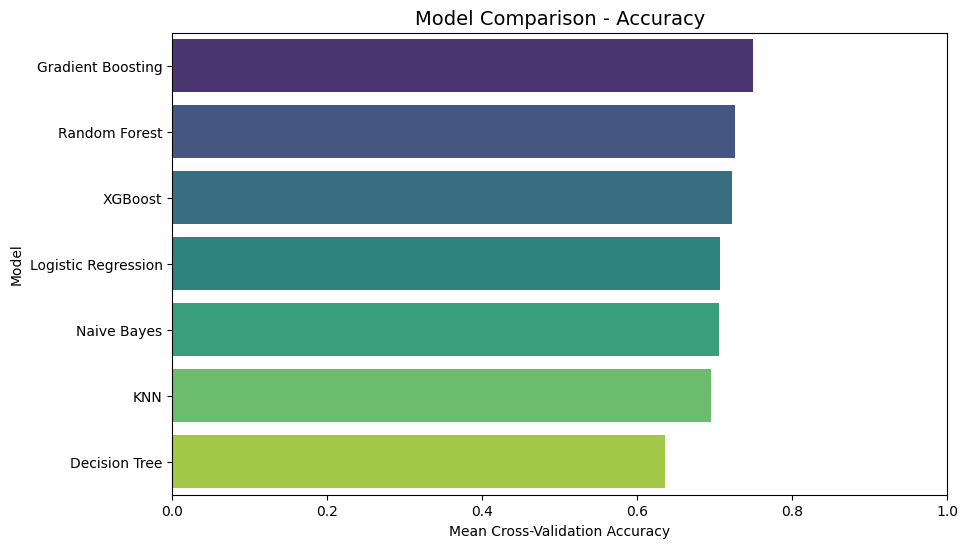

In [103]:
# Plot a barchart to compare the models by accuracy
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results dictionary to DataFrame for plotting
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print(results_df)
# Sort by accuracy
results_df = results_df.sort_values(by="Accuracy", ascending=False)
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Comparison - Accuracy", fontsize=14)
plt.xlabel("Mean Cross-Validation Accuracy")
plt.ylabel("Model")
plt.xlim(0,1)  # accuracy ranges between 0 and 1
plt.show()
